In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import glob
from sklearn import model_selection
from config import Config
import utils
import model as modellib
import visualize
from model import log

Using TensorFlow backend.


In [2]:
ROOT_DIR='I:/code/github code/Unconstrained-iris-segmentation-using-Mask-R-CNN-master/'
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
MODEL_PATH = os.path.join(ROOT_DIR,"Weights/mask_rcnn_irises_casia.h5" )

In [3]:
class irisConfig(Config):
    NAME = "irises"

    GPU_COUNT = 1
    IMAGES_PER_GPU = 2

    NUM_CLASSES = 1 + 1  # background + 3 shapes

    IMAGE_MIN_DIM =320
    IMAGE_MAX_DIM =320
    IMAGE_MIN_SCALE = 0
    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 1000

    VALIDATION_STEPS = 50   
class InferenceConfig(irisConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
inference_config = InferenceConfig()
inference_config.display()
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)
#Loads weights from a static model file
model.load_weights(MODEL_PATH, by_name=True)

import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn import model_selection
import re
from scipy import ndimage
import skimage.io
from PIL import Image
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
import time
from Model.visualize import display_images,display_weight_stats
import Model.utils as utils

class_names = ['BG','iris']

# Root directory of the project

# Load images from folder

numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax


W1103 15:29:57.677812 20608 deprecation_wrapper.py:119] From J:\python install file\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.




Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           irises
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS

W1103 15:29:58.589134 20608 deprecation_wrapper.py:119] From J:\python install file\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1103 15:29:58.719745 20608 deprecation_wrapper.py:119] From J:\python install file\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1103 15:29:58.968611 20608 deprecation_wrapper.py:119] From J:\python install file\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1103 15:29:58.985805 20608 deprecation_wrapper.py:119] From J:\python install file\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1103 15:30:01.760624 20608 deprecation_wrapper.py:119] From J:\python

C:\Users\Sepehr Rayaneh\Desktop\img\001


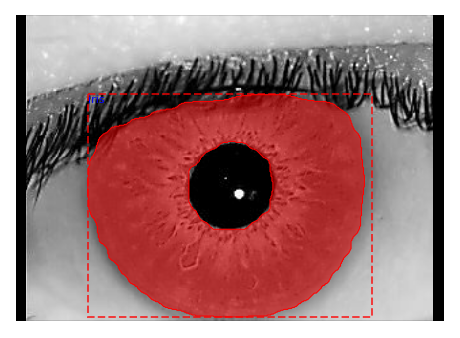

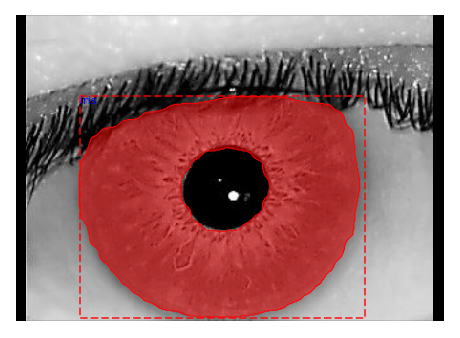

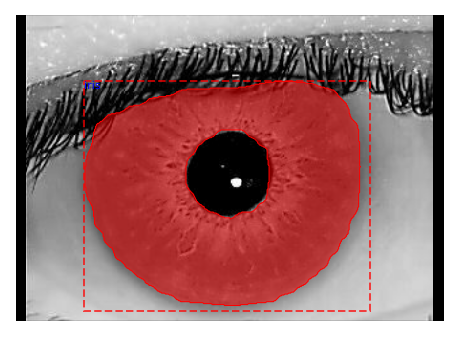

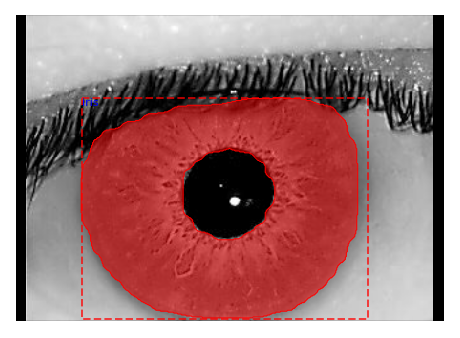

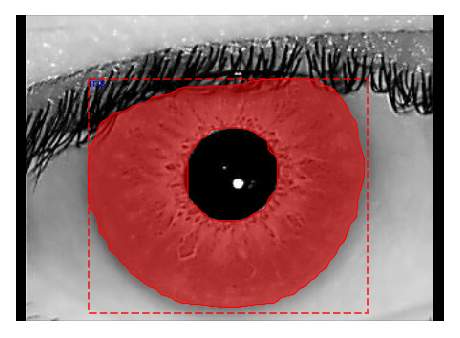

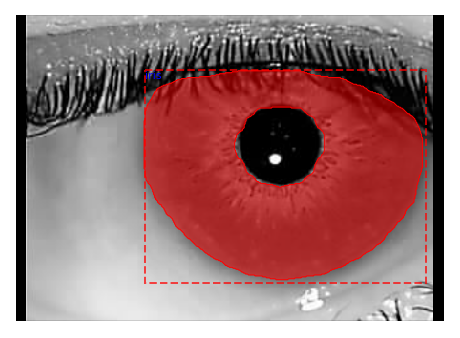

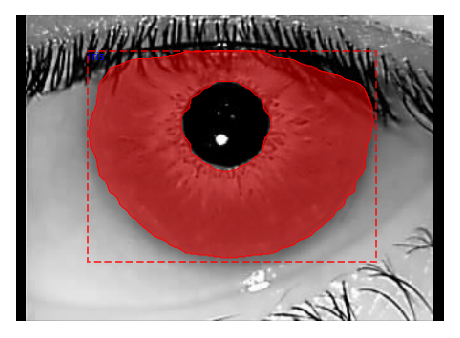

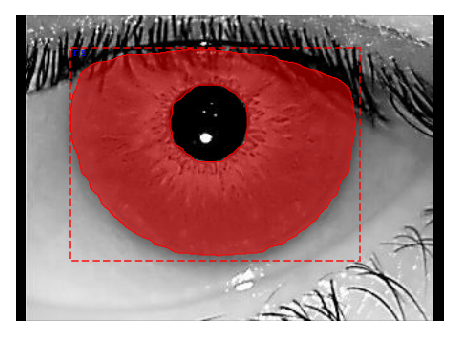

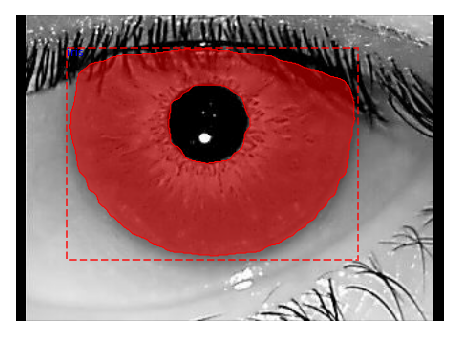

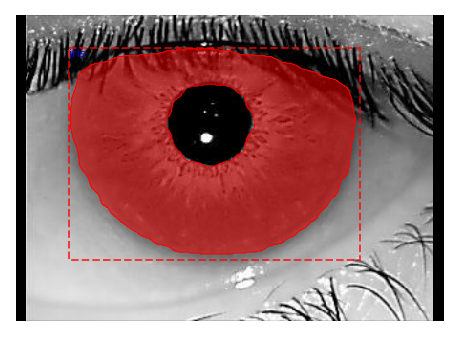

In [4]:
#data_dir ='I:/IRIS DATASET/ORIIIIIIIIIIGINAL/IITD_database/IITD Database'
#data_dir='C:\\Users\\Sepehr Rayaneh\\Desktop\\img'
data_dir='I:\\CASIA-Iris-Interval'


for item in os.listdir(data_dir):
    path=os.path.join(data_dir,item)
    #path = f'{path}/L'
    print(path)
    counter=0
    for img in os.listdir(path):
        if counter<10:
            pathimage=os.path.join(path,img)
            im=cv2.imread(pathimage)
        
            path2='C:\\Users\\Sepehr Rayaneh\\Desktop\\seg'
            path3=os.path.join(path2,item)
            if not os.path.exists(path3):
                os.mkdir(path3)
            pathwrite=os.path.join(path3,str(item)+'_'+img)
        #pathwrite2=os.path.join(pathwrite,str(item)+img)
            centered = 1
            image = skimage.color.gray2rgb(im)
            height=image.shape[0]
            width = image.shape[1]
            dim = (width, height)
            im, window, scale, padding, crop = utils.resize_image(
            image,
            min_dim=inference_config.IMAGE_MIN_DIM,
            min_scale=inference_config.IMAGE_MIN_SCALE,
            max_dim=inference_config.IMAGE_MAX_DIM,
            mode="pad64")
        #im  = cv2.resize(im  , dim, interpolation = cv2.INTER_AREA)
            #print('Resized Dimensions : ',im.shape)
            #inference_config.IMAGE_MIN_DIM
            #inference_config.IMAGE_MAX_DIM
            results = model.detect([im], verbose=0)
        
            r = results[0]
            mask = r['masks'][:, :, 0]
            bbox = r['rois'][0]
            end = time.time()
            saveName = img
            saveName = re.sub('[.].*','.bmp',saveName)
            PADDING =20
            if(centered):
                cx = ((bbox[0]+bbox[2])//2)
                cy = ((bbox[1]+bbox[3])//2)
                

                croppedMask = mask[bbox[0]-PADDING:bbox[2]+PADDING, bbox[1]-PADDING:bbox[3]+PADDING]
                croppedIm = im[bbox[0]-PADDING:bbox[2]+PADDING, bbox[1]-PADDING:bbox[3]+PADDING]


                tIm = croppedIm[:,:,0]
                croppedMask = croppedMask*255
               

                anded =np.bitwise_and(tIm,croppedMask)
                model_image_size = (200, 200)
                anded =anded.astype(np.float32)
                anded=cv2.resize(anded, model_image_size, interpolation = cv2.INTER_CUBIC)
                model_image_size2 = (200,200)
                tIm  =tIm .astype(np.float32)
                tIm =cv2.resize(tIm , model_image_size2, interpolation = cv2.INTER_CUBIC)
                matplotlib.image.imsave(pathwrite,anded,cmap = 'gray') 
            if(not centered):
                tIm = im[:,:,0]
                mask = mask*255
                anded =np.bitwise_and(tIm,mask)
                
                matplotlib.image.imsave(pathwrite, r['rois'],cmap = 'gray')
            saveName = re.sub('[.].*','.jpg',saveName)
            visualize.display_instances(im, r['rois'], r['masks'], r['class_ids'],
                                        class_names,show_bbox = True, ax=get_ax())
            maskFolder='I:/code/github code/Unconstrained-iris-segmentation-using-Mask-R-CNN-master/casia_mask'
            path4=os.path.join(maskFolder,item)
        
            if not os.path.exists(path4):
                os.makedirs(path4)
        counter += 1
        maskpathwrite=os.path.join(path4,img)
        
        #matplotlib.image.imsave(path4 + "/" + saveName, mask,cmap = 'gray')

#         mResized = resize(anded, (200, 200))
        #saveName = re.sub('[.].*','.png',saveName)
        
        
        
        
        
        #matplotlib.image.imsave(pathwrite ,mask)
            
            
        